In [121]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




# Initialize empty lists for the extracted columns
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
city_list = ['bangalore','chennai', 'delhi', 'hyderabad','jaipur','kolkata'] 

def process_city_data(city):
    # Load the city's dataset
    data = pd.read_excel("D:/bangalore_cars.xlsx")
    data = pd.read_excel("D:/chennai_cars.xlsx")
    data = pd.read_excel("D:/delhi_cars.xlsx")
    data = pd.read_excel("D:/hyderabad_cars.xlsx")
    data = pd.read_excel("D:/jaipur_cars.xlsx")
    data = pd.read_excel("D:/kolkata_cars.xlsx")
    
    # Initialize lists to hold the extracted values for the city

    city_fuel_type = []
    city_Kilometers_driven = []
    city_Transmission_type = []
    city_No_of_owners = []
    city_Original_Equipment_Manufacturer = []
    city_model = []
    city_model_Year = []
    city_Price = []
    city_registration_year = []
    city_seats = []
    city_engine_cc = []
    city_Mileage = []
    
    # Loop through each row in the city's data to extract information
    for i in range(data.shape[0]):
        new_car_detail = data['new_car_detail'][i]
        new_car_overview = data['new_car_overview'][i]
        new_car_specs = data['new_car_specs'][i]

        # Convert string to dictionary using ast.literal_eval
        data_dict = ast.literal_eval(new_car_detail)
        data_dict_1 = ast.literal_eval(new_car_overview)
        data_dict_2 = ast.literal_eval(new_car_specs)

        # Extract relevant information
        city_fuel_type.append(data_dict['ft'])
        city_Kilometers_driven.append(data_dict['km'])
        city_Transmission_type.append(data_dict['transmission'])
        city_No_of_owners.append(data_dict['ownerNo'])
        city_Original_Equipment_Manufacturer.append(data_dict['oem'])
        city_model.append(data_dict['model'])
        city_model_Year.append(int(data_dict['modelYear']))
        city_Price.append(float(data_dict['price'][2:-5])*100000) 
        city_registration_year.append(data_dict_1['top'][0]['value'][-4:])
        city_seats.append(data_dict_1['top'][3]['value'][0])

        # Check the type before handling engine_cc
        if isinstance(data_dict_2['data'][0]['list'][2]['value'], str) and data_dict_2['data'][0]['list'][2]['value'].isnumeric():
            city_engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            city_engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])

        city_Mileage.append(data_dict_2['top'][0]['value'][:-5])

    # Create a DataFrame with the extracted columns
    city_df = pd.DataFrame({
        'Fuel_Type': city_fuel_type,
        'Kilometers_Driven': city_Kilometers_driven,
        'Transmission_Type': city_Transmission_type,
        'No_of_Owners': city_No_of_owners,
        'Manufactured_By': city_Original_Equipment_Manufacturer,
        'Car_Model': city_model,
        'Car_Produced_Year': city_model_Year,
        'Car_Price': city_Price,
        'Registration_Year': city_registration_year,
        'No_of_Seats': city_seats,
        'Engine_CC': city_engine_cc,
        'Mileage(kmpl)': city_Mileage
    })

    # Add the city name as a new column
    city_df['City'] = city.capitalize()

    return city_df

# Process data for all cities and merge them
all_city_data = pd.DataFrame()
for city in city_list:
    city_data = process_city_data(city)
    all_city_data = pd.concat([all_city_data, city_data], ignore_index=True)

# Display the merged DataFrame
print(all_city_data.head()) 

  Fuel_Type Kilometers_Driven Transmission_Type  No_of_Owners Manufactured_By  \
0    Petrol            70,000         Automatic             3          Toyota   
1    Petrol            23,981            Manual             1          Datsun   
2    Petrol             7,100         Automatic             1         Renault   
3    Petrol            71,574            Manual             2         Hyundai   
4    Diesel            50,000         Automatic             2            Audi   

       Car_Model  Car_Produced_Year  Car_Price Registration_Year No_of_Seats  \
0   Toyota Camry               2014   975000.0              2014           5   
1  Datsun RediGO               2017   266000.0              2017           5   
2  Renault Kiger               2021   595000.0              2021           5   
3    Hyundai i20               2011   223000.0              2012           5   
4        Audi Q3               2014  1200000.0              2014           5   

  Engine_CC Mileage(kmpl)       

In [122]:
all_city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8286 entries, 0 to 8285
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          8286 non-null   object 
 1   Kilometers_Driven  8286 non-null   object 
 2   Transmission_Type  8286 non-null   object 
 3   No_of_Owners       8286 non-null   int64  
 4   Manufactured_By    8286 non-null   object 
 5   Car_Model          8286 non-null   object 
 6   Car_Produced_Year  8286 non-null   int64  
 7   Car_Price          8286 non-null   float64
 8   Registration_Year  8286 non-null   object 
 9   No_of_Seats        8286 non-null   object 
 10  Engine_CC          8286 non-null   object 
 11  Mileage(kmpl)      8286 non-null   object 
 12  City               8286 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 841.7+ KB


In [123]:
all_city_data[all_city_data.duplicated()]

,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),City
24,Diesel,"30,000",Automatic,2,Land Rover,Land Rover Range Rover Evoque,2020,5990000.0,2020,5,1999,19,Bangalore
45,Petrol,"60,000",Manual,1,Maruti,Maruti Swift Dzire,2010,245000.0,2010,5,1298,17.5,Bangalore
190,Petrol,"10,000",Manual,2,Maruti,Maruti XL6,2021,950000.0,2021,6,1462,19.01,Bangalore
207,Petrol,"10,000",Manual,1,Tata,Tata Altroz,2020,735000.0,2020,5,1199,19.33,Bangalore
215,Petrol,"1,00,000",Manual,1,Hyundai,Hyundai i10,2015,310000.0,2015,5,1086,19.81,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8129,Petrol,"54,000",Automatic,1,Volkswagen,Volkswagen Vento,2017,650000.0,2017,5,1197,18.19,Kolkata
8181,Petrol,"29,000",Automatic,1,Hyundai,Hyundai Venue,2021,950000.0,2021,5,998,18.15,Kolkata
8214,Petrol,"20,000",Manual,1,Kia,Kia Carens,2022,1099000.0,2022,7,1497,14,Kolkata
8256,Petrol,"10,000",Manual,1,Maruti,Maruti Swift,2021,650000.0,2021,5,1197,21.21,Kolkata


In [124]:
all_city_data.drop_duplicates(inplace = True)
all_city_data.shape

(8154, 13)

In [125]:
all_city_data.info

<bound method DataFrame.info of      Fuel_Type Kilometers_Driven Transmission_Type  No_of_Owners  \
0       Petrol            70,000         Automatic             3   
1       Petrol            23,981            Manual             1   
2       Petrol             7,100         Automatic             1   
3       Petrol            71,574            Manual             2   
4       Diesel            50,000         Automatic             2   
...        ...               ...               ...           ...   
8281    Petrol            10,000            Manual             1   
8282    Petrol          1,20,000            Manual             1   
8283    Petrol            50,000         Automatic             3   
8284    Petrol            40,000            Manual             1   
8285    Diesel          1,20,000            Manual             2   

     Manufactured_By              Car_Model  Car_Produced_Year  Car_Price  \
0             Toyota           Toyota Camry               2014   975000.0 

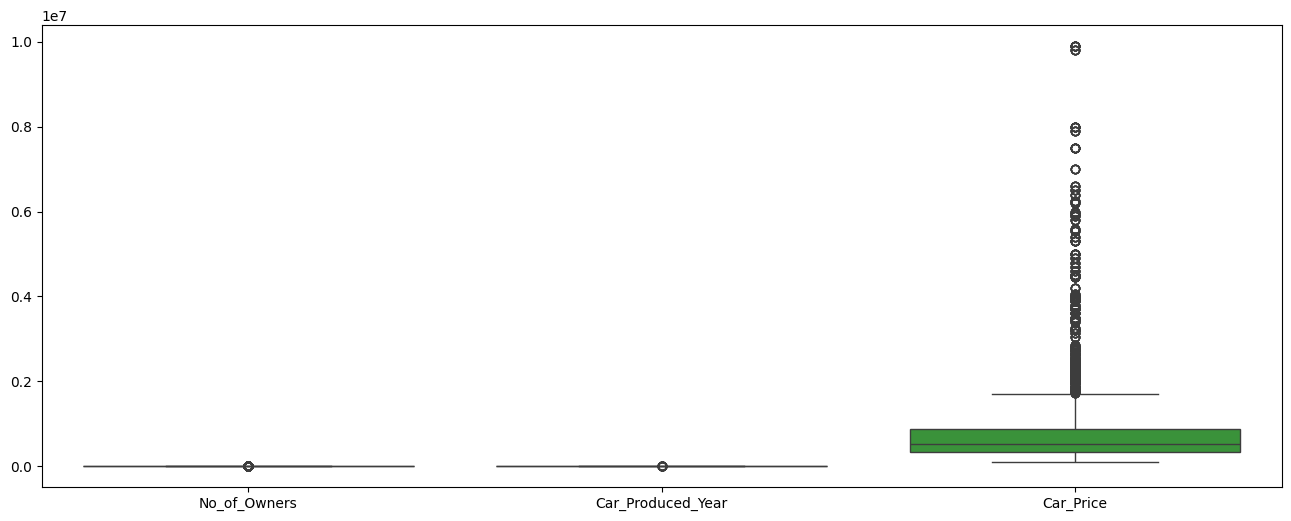

In [126]:
plt.figure(figsize=(16,6))
sns.boxplot(data=all_city_data)
plt.show()

No_of_Owners


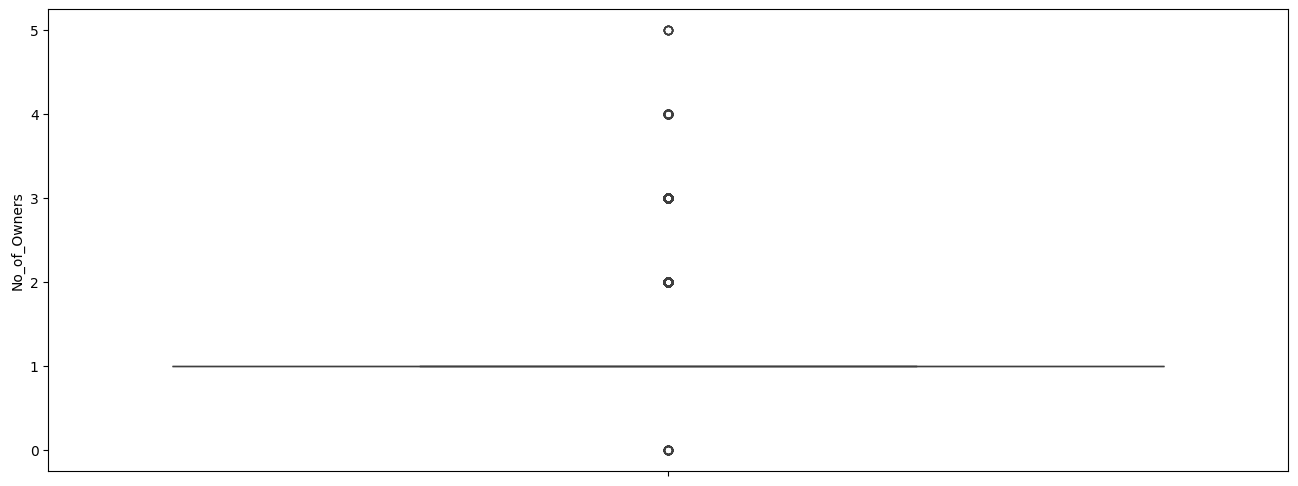

Car_Produced_Year


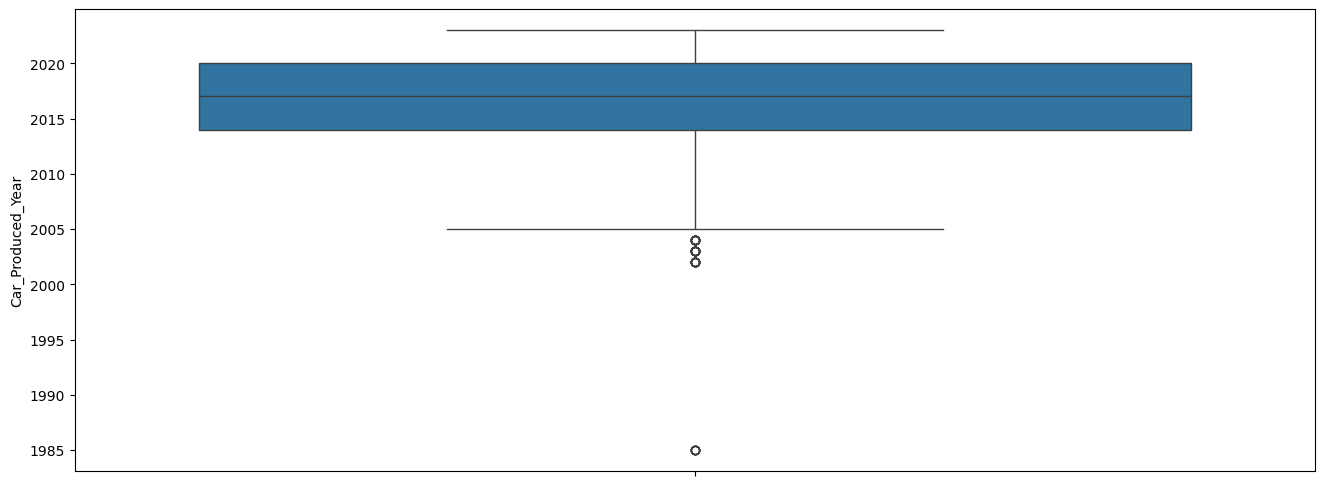

Car_Price


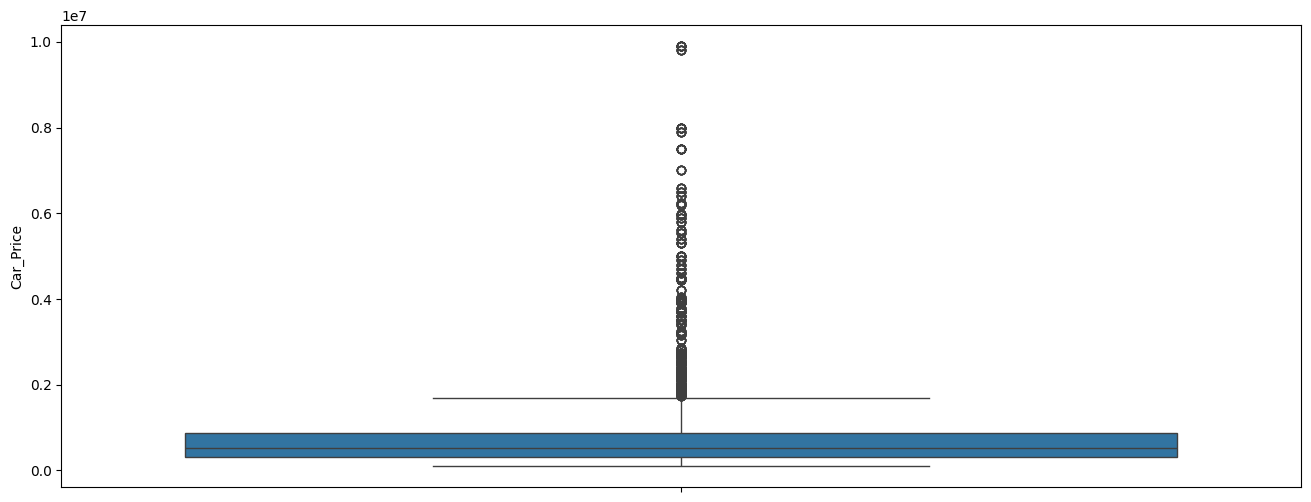

In [127]:
for i in all_city_data.columns:
    if all_city_data[i].dtype != 'object':
        print(i)
        plt.figure(figsize=(16,6))
        sns.boxplot(data=all_city_data[i])
        plt.show()

In [128]:
price = all_city_data[(all_city_data['Car_Produced_Year']<2009)&(all_city_data['Car_Price']>1000000)&(all_city_data['Manufactured_By']!= 'BMW')]
all_city_data.drop(price.index, inplace = True)

In [129]:
all_city_data.to_csv('Cleaned_Car_Dheko.csv', index = False)

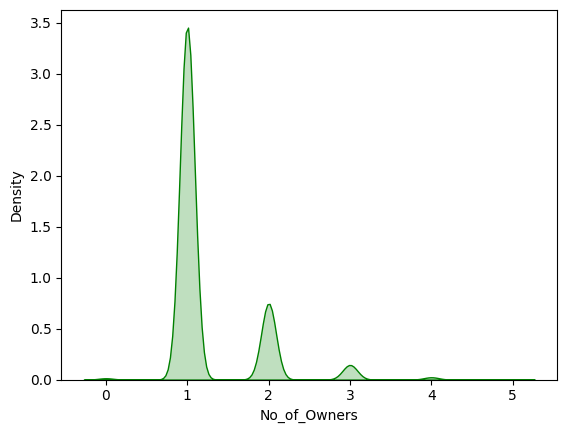

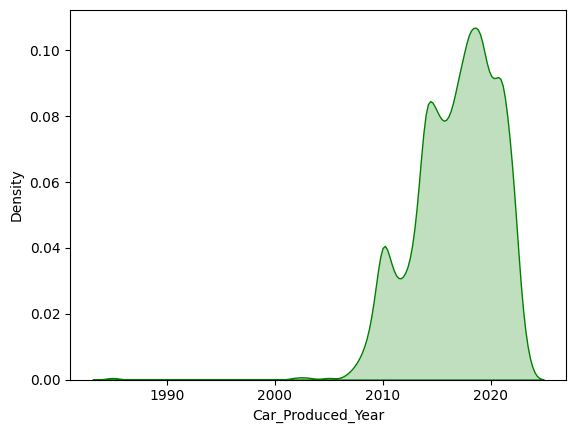

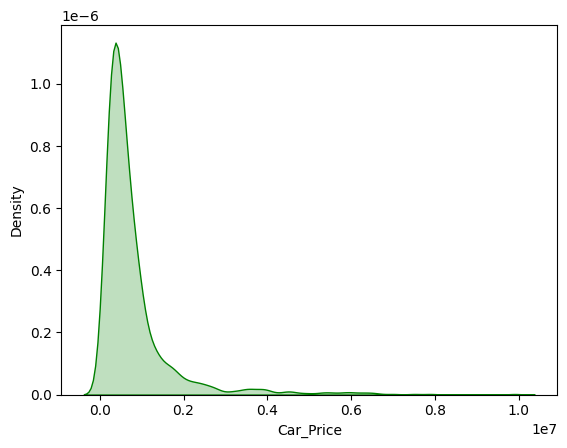

In [130]:
for i in all_city_data.columns:
    if all_city_data[i].dtype != 'object' :
        sns.kdeplot(data=all_city_data[i],fill=True,color="g")
        plt.show()

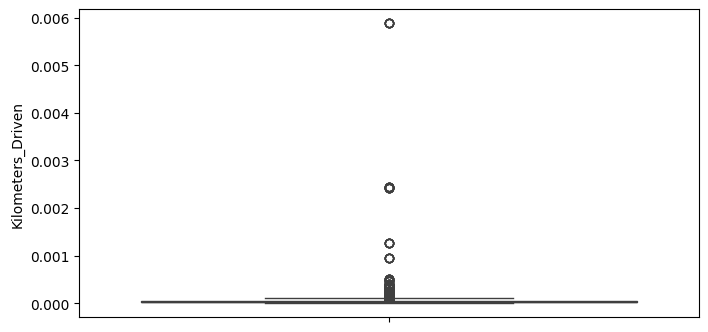

In [131]:
def inv_trans(x):
    if x!=0:
        return 1/x
    else:
        return 0

# data = data_3.copy()
 #Convert 'Kilometers_Driven' to numeric
all_city_data['Kilometers_Driven'] = (
    all_city_data['Kilometers_Driven']
    .str.replace(',', '')  
    .astype(float)         
)
all_city_data['Kilometers_Driven'] = all_city_data['Kilometers_Driven'].apply(inv_trans)
plt.figure(figsize=(8,4))
sns.boxplot(data=all_city_data['Kilometers_Driven'])
plt.show()

<Axes: >

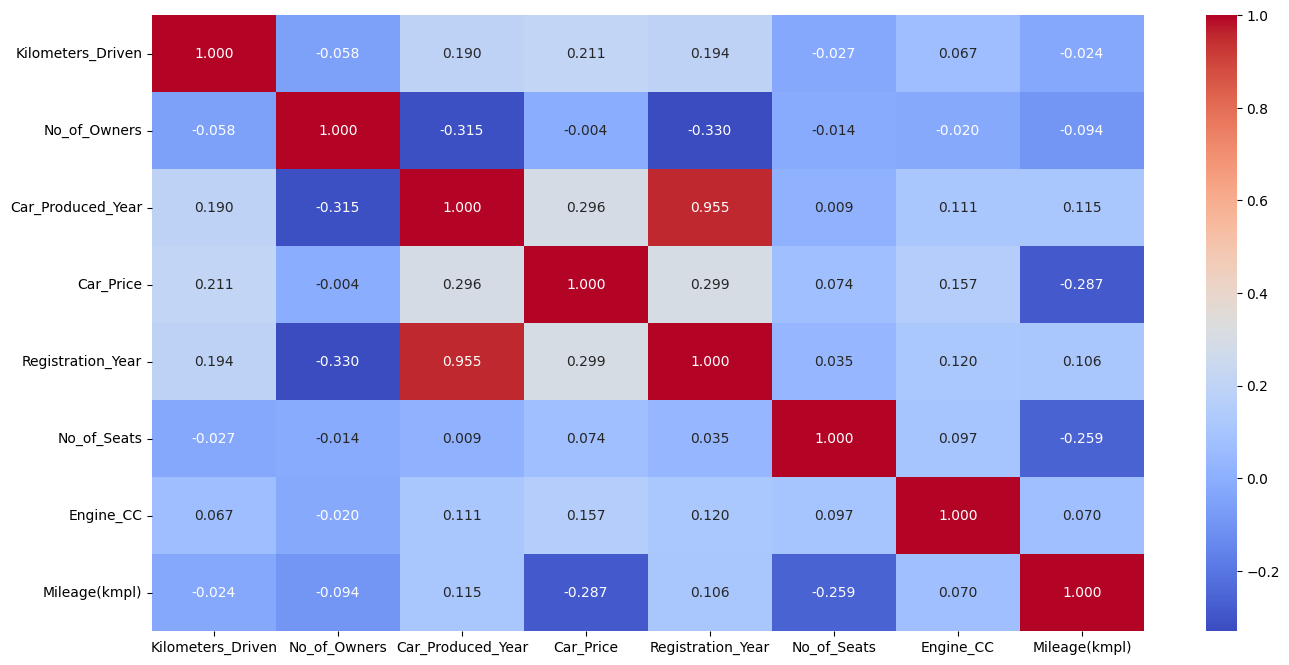

In [132]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

for i in all_city_data.columns:
    if all_city_data[i].dtype == 'object':
        col_name = i
        all_city_data[i] = enc.fit_transform(all_city_data[[i]])
        encode = all_city_data[i].sort_values().unique() # 0.0,1.0,2.0 - this is encoded value
        globals()[col_name] = {}
        decoded_data = enc.inverse_transform(all_city_data[[i]])
        decoded = sorted(np.unique(decoded_data)) # original value of dataframe - like decoded value
        globals()[i] = dict(zip(decoded, encode))
all_city_data.to_csv('Preprocessed_Car_Dheko.csv', index = False)
df = pd.read_csv('Preprocessed_Car_Dheko.csv')
continuous = df[['Kilometers_Driven','No_of_Owners','Car_Produced_Year','Car_Price','Registration_Year','No_of_Seats','Engine_CC','Mileage(kmpl)']]
categorical = df[['Fuel_Type','Transmission_Type','Manufactured_By','Car_Model','City']]
plt.figure(figsize=(16,8))
sns.heatmap(continuous.corr(),annot=True,cmap="coolwarm",fmt=".3f")

In [133]:
# checking hypothesis testing categorical column to categorical column
from scipy.stats import chi2_contingency

for i in categorical:
    for j in categorical:
        contingency_table = pd.crosstab(df[i], df[j])
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        print(i,j,p_value)

Fuel_Type Fuel_Type 0.0
Fuel_Type Transmission_Type 7.663208602659873e-85
Fuel_Type Manufactured_By 0.0
Fuel_Type Car_Model 0.0
Fuel_Type City 1.0
Transmission_Type Fuel_Type 7.663208602659873e-85
Transmission_Type Transmission_Type 0.0
Transmission_Type Manufactured_By 0.0
Transmission_Type Car_Model 0.0
Transmission_Type City 1.0
Manufactured_By Fuel_Type 0.0
Manufactured_By Transmission_Type 0.0
Manufactured_By Manufactured_By 0.0
Manufactured_By Car_Model 0.0
Manufactured_By City 1.0
Car_Model Fuel_Type 0.0
Car_Model Transmission_Type 0.0
Car_Model Manufactured_By 0.0
Car_Model Car_Model 0.0
Car_Model City 1.0
City Fuel_Type 1.0
City Transmission_Type 1.0
City Manufactured_By 1.0
City Car_Model 1.0
City City 0.0


In [134]:
from sklearn.ensemble import RandomForestRegressor
features = df.drop('Car_Price',axis = 1)
target = df['Car_Price']
model = RandomForestRegressor(n_estimators=20,random_state=40)
model.fit(features,target)

RandomForestRegressor(n_estimators=20, random_state=40)

In [135]:
model.feature_importances_

array([1.62694247e-02, 9.02170577e-02, 2.33896798e-01, 5.15179160e-02,
       1.90705329e-02, 3.78754105e-02, 8.28410802e-02, 8.77603106e-02,
       1.48502586e-02, 2.61181653e-01, 1.04492373e-01, 2.71848090e-05])

In [136]:
feature_importance = pd.DataFrame({
    "column": features.columns,
    "Score": model.feature_importances_ *100
}).sort_values('Score',ascending=False)#.head(12).column.values
feature_importance

,column,Score
9,Engine_CC,26.118165
2,Transmission_Type,23.389680
10,Mileage(kmpl),10.449237
1,Kilometers_Driven,9.021706
7,Registration_Year,8.776031
6,Car_Produced_Year,8.284108
3,No_of_Owners,5.151792
5,Car_Model,3.787541
4,Manufactured_By,1.907053
0,Fuel_Type,1.626942


In [137]:
from sklearn.model_selection import train_test_split

# Assuming X (features) and y (target) are already defined
X = all_city_data.drop(['Car_Price'], axis=1)
y = all_city_data['Car_Price']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Check the shapes of the splits
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(6460, 12) (1616, 12) (6460,) (1616,)


In [142]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 400, min_samples_split = 10, min_samples_leaf = 7, random_state=50)
model_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=400, min_samples_leaf=7, min_samples_split=10,
                      random_state=50)

In [143]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

y_pred_test = model_DT.predict(x_test)
y_pred_train = model_DT.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

89411.29270368435
95407.85550052258
0.8533256440389901
0.8379051171543104


In [144]:
#feature selection
selected_features = ['Manufactured_By', 'Car_Model', 'Car_Produced_Year', 
                     'Transmission_Type', 'City', 'Kilometers_Driven', 
                     'Engine_CC', 'Mileage(kmpl)', 'Fuel_Type', 
                     'No_of_Owners', 'No_of_Seats']
x = df [selected_features]
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(criterion = 'squared_error', n_estimators=700, max_depth = 25, min_samples_split = 7, min_samples_leaf = 5, random_state=50)
model_RF.fit(x_train[selected_features], y_train)

# Ensure alignment between training and testing data
x_train = x_train[selected_features]
x_test = x_test[selected_features]

# Predict
y_pred_test = model_RF.predict(x_test)
y_pred_train = model_RF.predict(x_train)

# Metrics
print(mean_absolute_error(y_train, y_pred_train))
print( mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))


63515.378553150746
68872.74754525957
0.9313359156459453
0.9216719187378517


In [145]:
#feature selection
selected_features = ['Manufactured_By', 'Car_Model', 'Car_Produced_Year', 
                     'Transmission_Type', 'City', 'Kilometers_Driven', 
                     'Engine_CC', 'Mileage(kmpl)', 'Fuel_Type', 
                     'No_of_Owners', 'No_of_Seats']
x = df [selected_features]
from sklearn.ensemble import GradientBoostingRegressor
model_GB = GradientBoostingRegressor(n_estimators=400, max_depth=10, min_samples_split=7, learning_rate=0.01,)
model_GB.fit(x_train[selected_features], y_train)
y_pred_test = model_GB.predict(x_test)
y_pred_train = model_GB.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

19815.783411758603
21289.114103312797
0.9990349127295806
0.9986154336346478


In [ ]:
import pickle

with open('GradientBoost_model.pkl', 'wb') as file:
    pickle.dump(model_GB,file)